# Full Batch Gradient Descent for Logistic Regression

### Will be using a the Glucose and BMI data from the provided diabetes.csv dataset to predict Diabetes in patients.
Author: Cormac Taylor


# Imports

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pandas


# Libraries

- NumPy
- Pandas
- Matplotlib
- Sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Reading Raw Data

In [3]:
diabetesDataFrame = pd.read_csv("diabetes.csv")
print(diabetesDataFrame)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Removing Unused Data & Adding Bias Terms

In [4]:
X = diabetesDataFrame[["Glucose", "BMI"]]
y = diabetesDataFrame["Outcome"]

if 'Bias' not in X.columns:
    X.insert(0, 'Bias', 1, True)

print(X)
print(y)


     Bias  Glucose   BMI
0       1      148  33.6
1       1       85  26.6
2       1      183  23.3
3       1       89  28.1
4       1      137  43.1
..    ...      ...   ...
763     1      101  32.9
764     1      122  36.8
765     1      121  26.2
766     1      126  30.1
767     1       93  30.4

[768 rows x 3 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Visualizing Training and Test Data


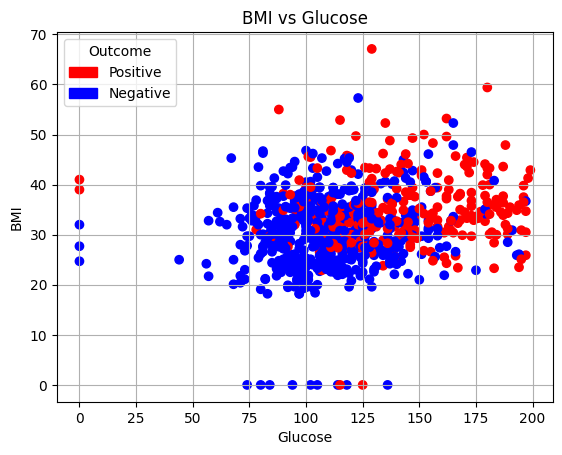

In [5]:
colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.title("BMI vs Glucose")
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.show()

# Splitting Training and Testing Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Batch Gradient Descent for Logistic Regression

In [7]:
class LogisticRegression:
    def __init__(self, learningRate=0.01, interations=10000):
        self.learningRate = learningRate
        self.interations = interations
        self.theta = None

    def sigmoid(self, x):
        if x > 0:
            return 1 / (1 + np.exp(-x))
        else:
            expr = np.exp(x)
            return expr / (1 + expr)

    def sigExpr(self, X):
        vectorSigmoid = np.vectorize(self.sigmoid)
        return vectorSigmoid(np.dot(X, self.theta))
        
    # https://www.baeldung.com/cs/gradient-descent-logistic-regression
    def train(self, X, y):
        dimention = y.size
        self.theta = np.random.rand(3)
        for _ in range(self.interations):
            expr = self.sigExpr(X)
            gradient = np.dot((expr - y).T, X)
            
            self.theta -= self.learningRate * (gradient / dimention)
            
    def predictions(self, X):
        y = []
        for p in self.sigExpr(X):
            y.append(1 if p > 0.5 else 0)
    
        return np.array(y)
    
    def decisionBoundry(self, X):
        return -(self.theta[0] + self.theta[1] * X) / self.theta[2]


# Model Validation and Graphing

Accuracy:  0.6428571428571429


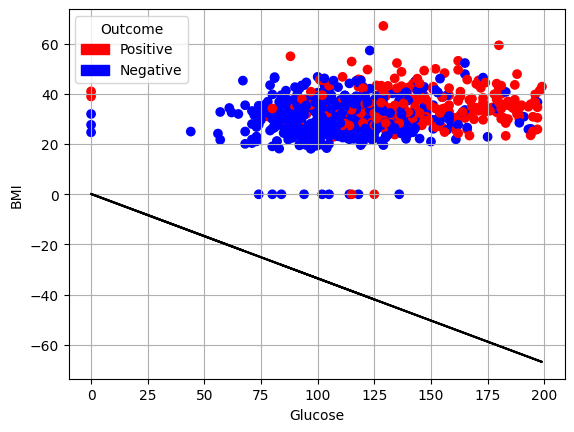

In [12]:
learningRate=0.004
interations=1000
lr = LogisticRegression(learningRate, interations)

lr.train(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, lr.predictions(X_test)))

colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.plot(X_train, lr.decisionBoundry(X_train), '-k', label='Learned Classification Line')

mpl.show()

Accuracy:  0.6428571428571429


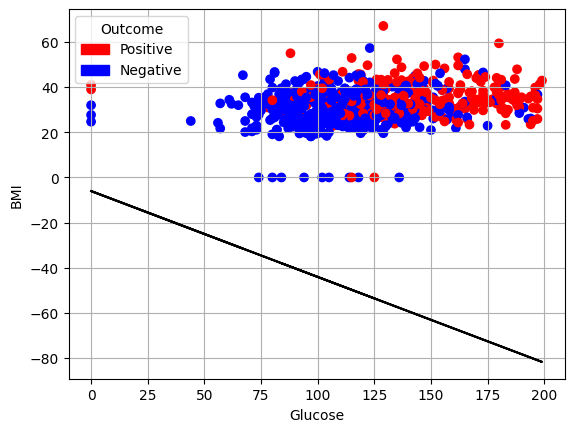

In [10]:
learningRate=0.004
interations=10000
lr = LogisticRegression(learningRate, interations)

lr.train(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, lr.predictions(X_test)))

colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.plot(X_train, lr.decisionBoundry(X_train), '-k', label='Learned Classification Line')

mpl.show()

Accuracy:  0.6103896103896104


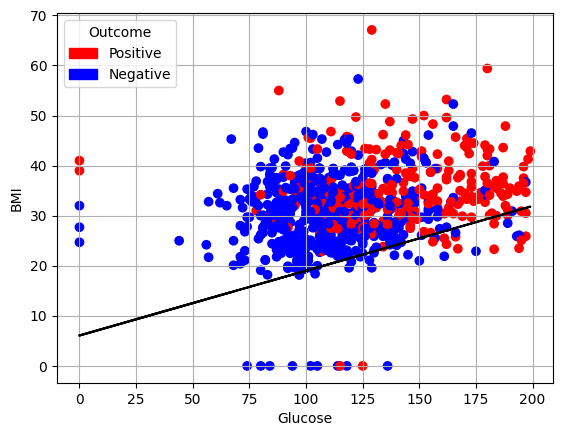

In [13]:
learningRate=0.0004
interations=10000
lr = LogisticRegression(learningRate, interations)

lr.train(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, lr.predictions(X_test)))

colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.plot(X_train, lr.decisionBoundry(X_train), '-k', label='Learned Classification Line')

mpl.show()

Accuracy:  0.7532467532467533


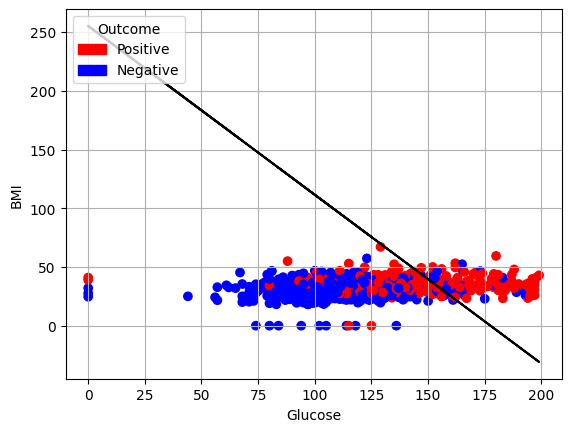

In [14]:
learningRate=0.004
interations=100000
lr = LogisticRegression(learningRate, interations)

lr.train(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, lr.predictions(X_test)))

colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.plot(X_train, lr.decisionBoundry(X_train), '-k', label='Learned Classification Line')

mpl.show()

Accuracy:  0.7077922077922078


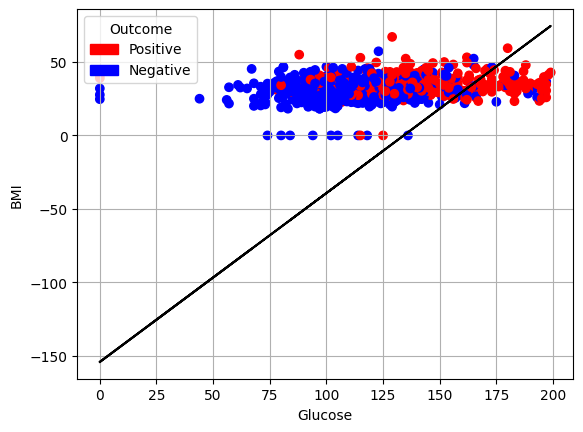

In [12]:
learningRate=0.0004
interations=100000
lr = LogisticRegression(learningRate, interations)

lr.train(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, lr.predictions(X_test)))

colorCondition = np.where(diabetesDataFrame['Outcome']==1,'red','blue')

mpl.scatter(diabetesDataFrame['Glucose'], diabetesDataFrame['BMI'], c=colorCondition)

mpl.xlabel('Glucose')
mpl.ylabel('BMI')
mpl.grid(True)

redPatch = mpatches.Patch(color='red', label='Positive')
bluePatch = mpatches.Patch(color='blue', label='Negative')
mpl.legend(handles=[redPatch, bluePatch], title="Outcome", loc='upper left')

mpl.plot(X_train, lr.decisionBoundry(X_train), '-k', label='Learned Classification Line')

mpl.show()